<a href="https://colab.research.google.com/github/mohtashim0007/Machine-Learning-Projects/blob/main/ObjectClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Imorting dependancy packages

import keras

In [2]:
# importing object classificaton dataset

from keras.datasets import cifar10

In [3]:
ds = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
type(ds)

tuple

In [5]:
len(ds)

2

In [6]:
train, test = ds

In [7]:
type(train)

tuple

In [8]:
len(train)

2

In [9]:
train_x, train_y = train
test_x , test_y = test

In [10]:
type(train_x)

numpy.ndarray

In [11]:
# training dataset contains 50k records
len(train_x)

50000

In [12]:
train_x.shape

(50000, 32, 32, 3)

In [13]:
train_y.shape

(50000, 1)

In [14]:
type(train_y)

numpy.ndarray

In [15]:
train_y[0:20]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6]], dtype=uint8)

In [16]:
print(train_y.max(), train_y.min())

9 0


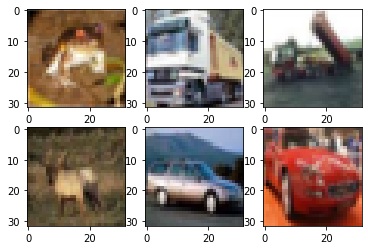

In [17]:
#importing required package and plotting first 6 iages of dataset using subplot fuction

from matplotlib import pyplot as plt
c=1
for i in train_x[0:6]:
  plt.subplot(2,3,c)
  c+=1
  plt.imshow(i)

In [18]:
#noralizing training and testing data pixels for faster execution and computation

train_x = train_x/255
train_y = train_y

test_x = test_x/255
test_y = test_y

In [19]:
#importing required packages

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [20]:
#converting categorical data to numerical for computation

test_yc = to_categorical(test_y)
train_yc = to_categorical(train_y)

In [21]:
#testing data contains 10K records

test_yc.shape

(10000, 10)

In [22]:
#Model building for Convolution Neural Network using keras package

def model_fun():
  model = keras.Sequential()
  model.add(keras.layers.Conv2D(filters= 32, kernel_size=(3,3) ,activation='relu', input_shape=(32,32,3)))
  #dropout to reduce overfitting problems
  model.add(keras.layers.Dropout(0.4))
  model.add(keras.layers.pooling.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3) , activation='relu'))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.pooling.MaxPooling2D(pool_size=(2,2)))

  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(100,activation='sigmoid'))
  model.add(keras.layers.Dense(10,activation= keras.activations.softmax))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [23]:
#Model training with 30 iteration

model = model_fun()
model.fit(train_x, train_yc, epochs= 30)

Epoch 1/30
1563/1563 [==============================] - 19s 4ms/step - loss: 1.4439 - accuracy: 0.4799
Epoch 2/30
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1154 - accuracy: 0.6076
Epoch 3/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9834 - accuracy: 0.6552
Epoch 4/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8957 - accuracy: 0.6887
Epoch 5/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8292 - accuracy: 0.7104
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7646 - accuracy: 0.7353
Epoch 7/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7113 - accuracy: 0.7527
Epoch 8/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6690 - accuracy: 0.7673
Epoch 9/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6267 - accuracy: 0.7824
Epoch 10/30
1563/1563 [==============================] - 6s 4ms/step - loss: 0.59

In [24]:
model.evaluate(test_x, test_yc)

313/313 [==============================] - 1s 3ms/step - loss: 1.0189 - accuracy: 0.7065


[1.0188536643981934, 0.7064999938011169]

In [25]:
# accuracy achieved 70% for test data